In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import california_housing
from sklearn.metrics import mean_squared_error

/Users/mk250077/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.california_housing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
housing_data = california_housing.fetch_california_housing()

In [3]:
Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])

In [4]:
df = Features.join(Target)

In [5]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [6]:
df[['MedInc', 'Target']].describe()[1:] 

,MedInc,Target
mean,3.870671,2.068558
std,1.899822,1.153956
min,0.499900,0.149990
25%,2.563400,1.196000
50%,3.534800,1.797000
75%,4.743250,2.647250
max,15.000100,5.000010


In [7]:
df = df[df.Target < 3.5]
df = df[df.MedInc < 8]

In [8]:
df[['MedInc', 'Target']].describe()[1:]

,MedInc,Target
mean,3.482030,1.722805
std,1.364922,0.749957
min,0.499900,0.149990
25%,2.452025,1.119000
50%,3.303600,1.635000
75%,4.346050,2.256000
max,7.988700,3.499000


In [9]:
def scale(x):
    min = x.min()
    max = x.max()
    return pd.Series([(i - min)/(max - min) for i in x])

X = scale(df.MedInc)
y = scale(df.Target)

In [10]:
X.max(), y.max() # features are scaled now


(1.0, 1.0)

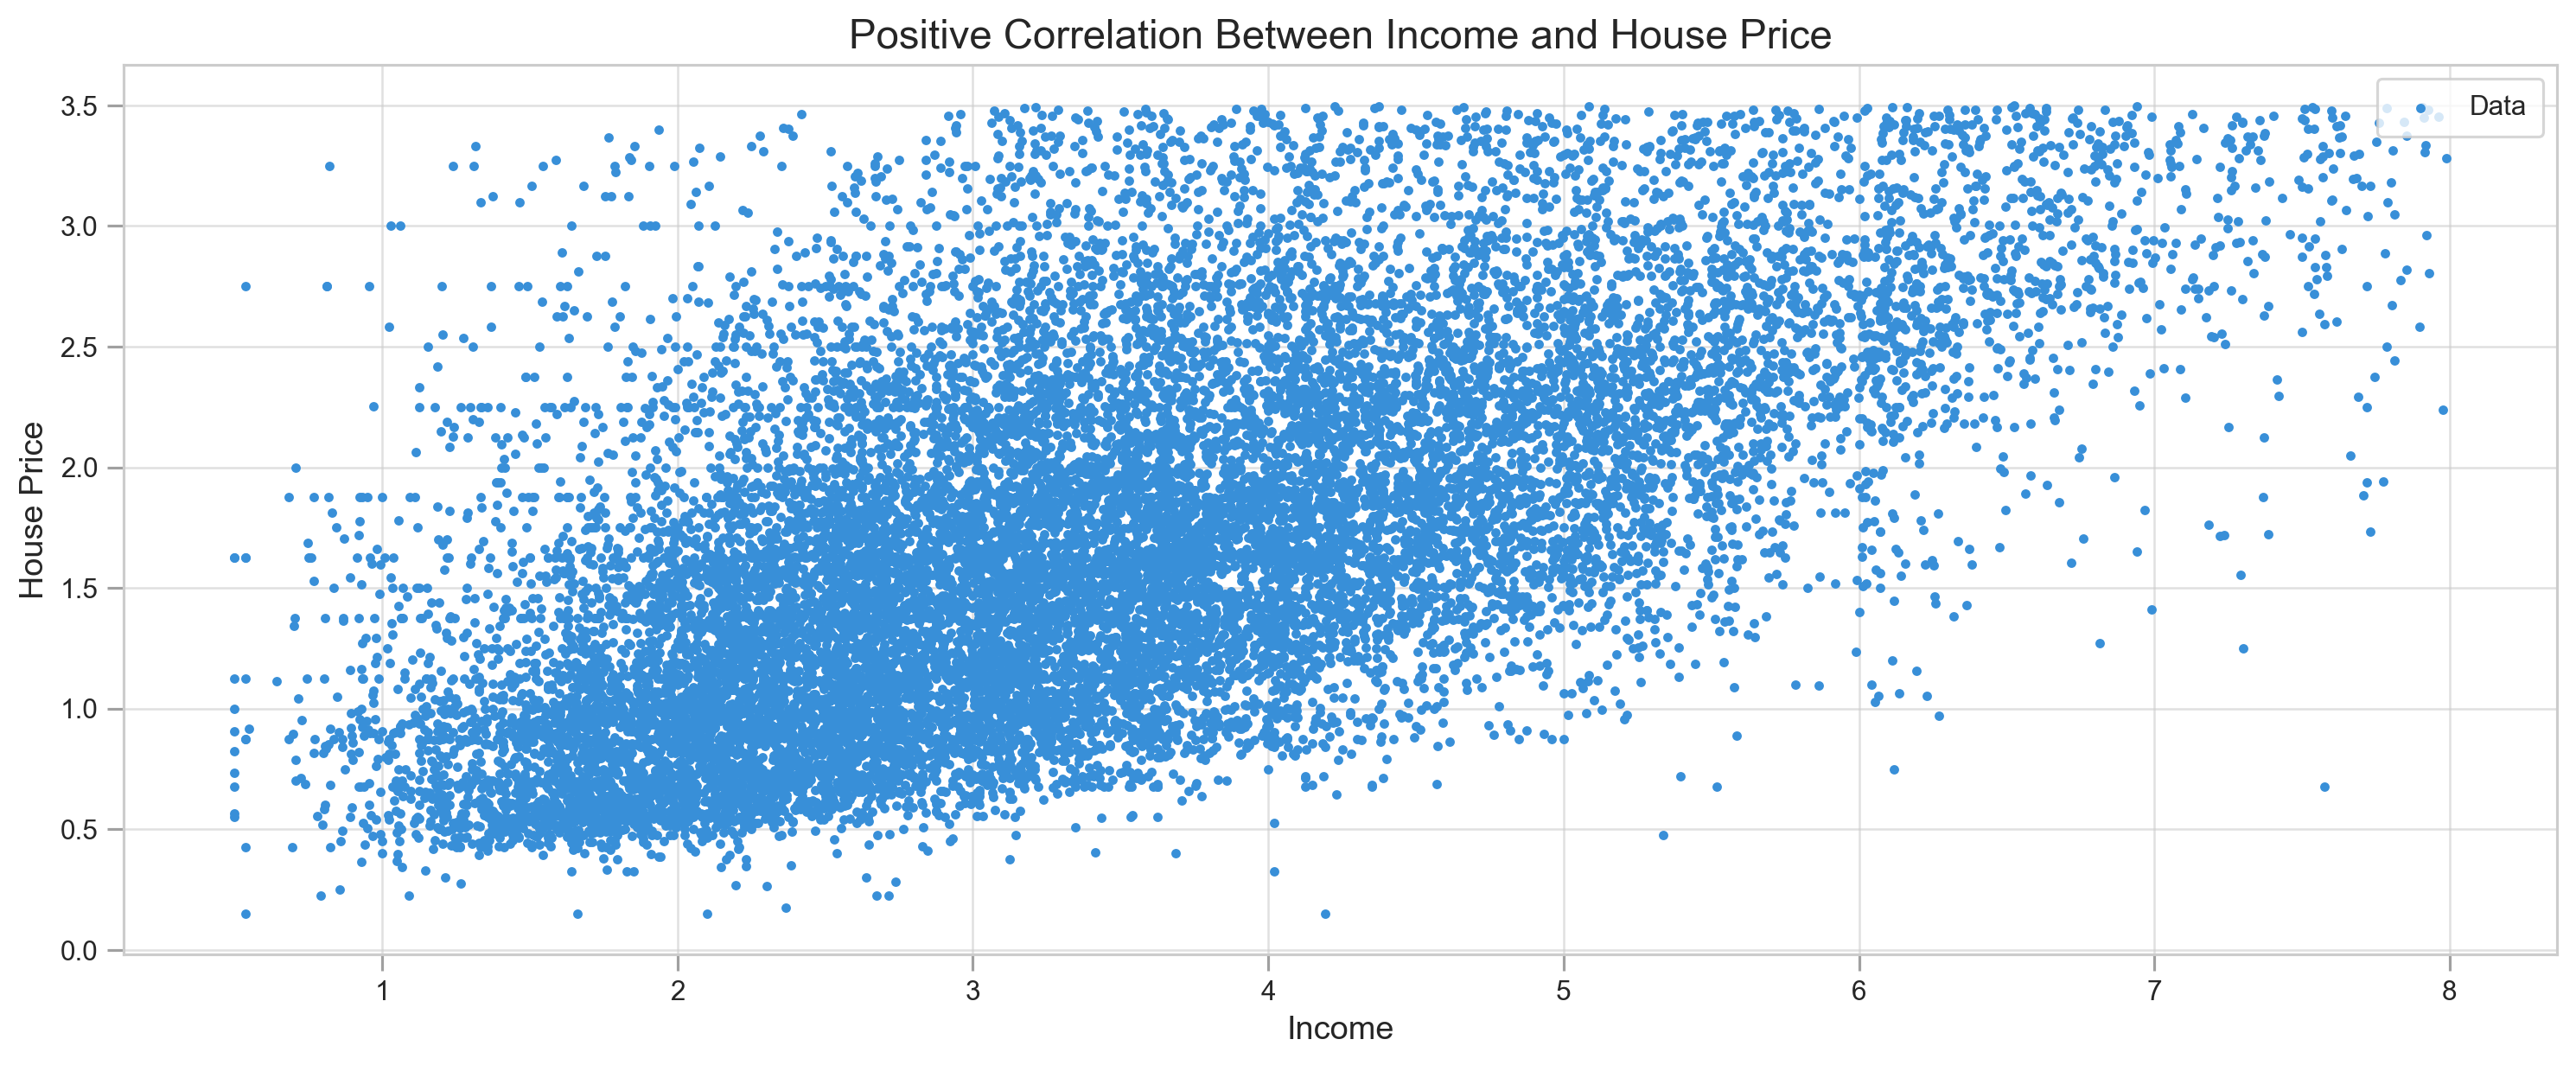

In [19]:
plt.figure(figsize=(16,6))
plt.rcParams['figure.dpi'] = 227
plt.style.use('seaborn-whitegrid')
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.title('Positive Correlation Between Income and House Price', fontSize=15)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.tick_params(direction='out', length=6, color='#a0a0a0', width=1, grid_alpha=.6)
plt.show()

# Simple Linear Regression

In [12]:
class SimpleLinearRegression:
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.m = ((np.mean(X) * np.mean(y) - np.mean(X*y)) / ((np.mean(X)**2) - np.mean(X**2)))
        self.b = np.mean(y) - self.m * np.mean(X)
    
    def coeffs(self):
        return self.m, self.b
    
    def predict(self):
        self.y_pred = self.m * self.X + self.b
        return self.y_pred
    
    def r_squared(self):
        self.y_mean = np.full((len(self.y)), mean(self.y))
        err_reg = sum((self.y - self.y_pred)**2)
        err_y_mean = sum((self.y - self.y_mean)**2)
        return (1 - (err_reg/err_y_mean))


In [13]:
def plot_regression(X, y, y_pred, log=None, title="Linear Regression"):
    
    plt.figure(figsize=(16,6))
    plt.rcParams['figure.dpi'] = 227
    plt.scatter(X, y, label='Data', c='#388fd8', s=6)
    if log != None:
        for i in range(len(log)):
            plt.plot(X, log[i][0]*X + log[i][1], lw=1, c='#caa727', alpha=0.35)
    plt.plot(X, y_pred, c='#ff7702', lw=3, label='Regression')
    plt.title(title, fontSize=14)
    plt.xlabel('Income', fontSize=11)
    plt.ylabel('Price', fontSize=11)
    plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
    plt.tick_params(direction='out', length=6, color='#a0a0a0', width=1, grid_alpha=.6)
    plt.show()

In [14]:
X = df.MedInc
y = df.Target

In [15]:
lr = SimpleLinearRegression()

In [16]:
lr.fit(X, y)

In [17]:
y_pred = lr.predict()


MSE: 0.3432052150225597


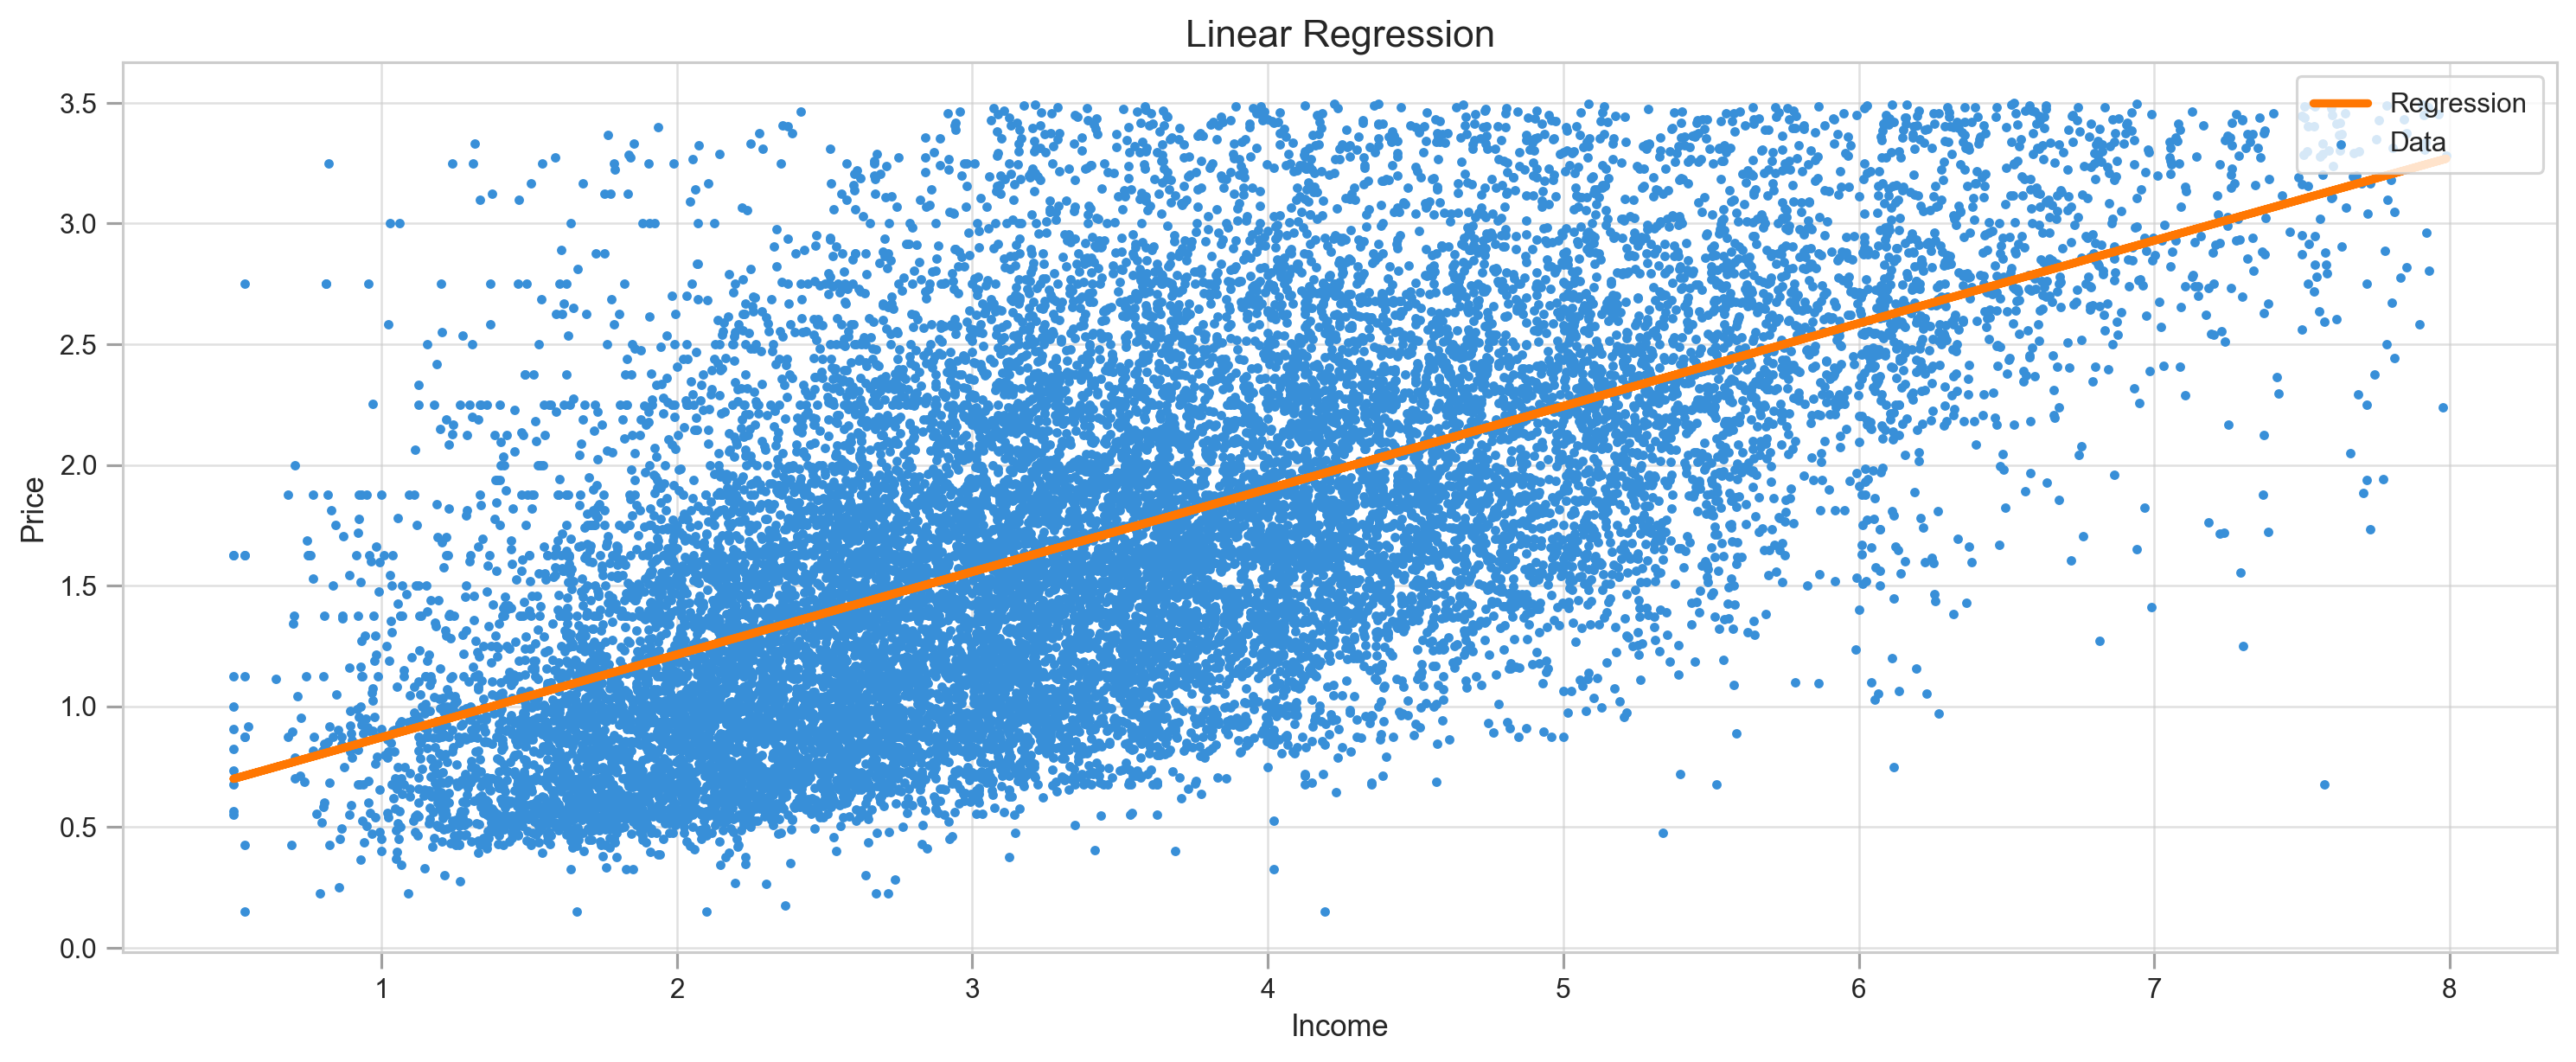

In [18]:
print("MSE:",mean_squared_error(y, y_pred))
plot_regression(X, y, y_pred, title="Linear Regression")

# Multiple Linear Regression with Least Squares

In [20]:
X = df.drop('Target', axis=1) # matrix A, or all the features
y = df.Target

In [21]:
class MultipleLinearRegression:
    '''
    Multiple Linear Regression with Least Squares    
    '''    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self.coeffs = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        
    def predict(self, X):
        X = np.array(X)
        result = np.zeros(len(X))
        for i in range(X.shape[1]):
            result += X[:, i] * self.coeffs[i]
        return result
    
    def coeffs(self):
        return self.coeffs

In [22]:
mlp = MultipleLinearRegression()

In [23]:
mlp.fit(X, y)

In [24]:
y_pred = mlp.predict(X)

In [25]:
mean_squared_error(y, y_pred)

0.291298453432104

# Gradient Descent

In [26]:
def gradient_descent(X, y, lr=0.05, epoch=10):
    
    '''
    Gradient Descent for a single feature
    '''
    
    m, b = 0.2, 0.2 # parameters
    log, mse = [], [] # lists to store learning process
    N = len(X) # number of samples
    
    for _ in range(epoch):
                
        f = y - (m*X + b)
    
        # Updating m and b
        m -= lr * (-2 * X.dot(f).sum() / N)
        b -= lr * (-2 * f.sum() / N)
        
        log.append((m, b))
        mse.append(mean_squared_error(y, (m*X + b)))        
    
    return m, b, log, mse

MSE: 0.3493097403876614


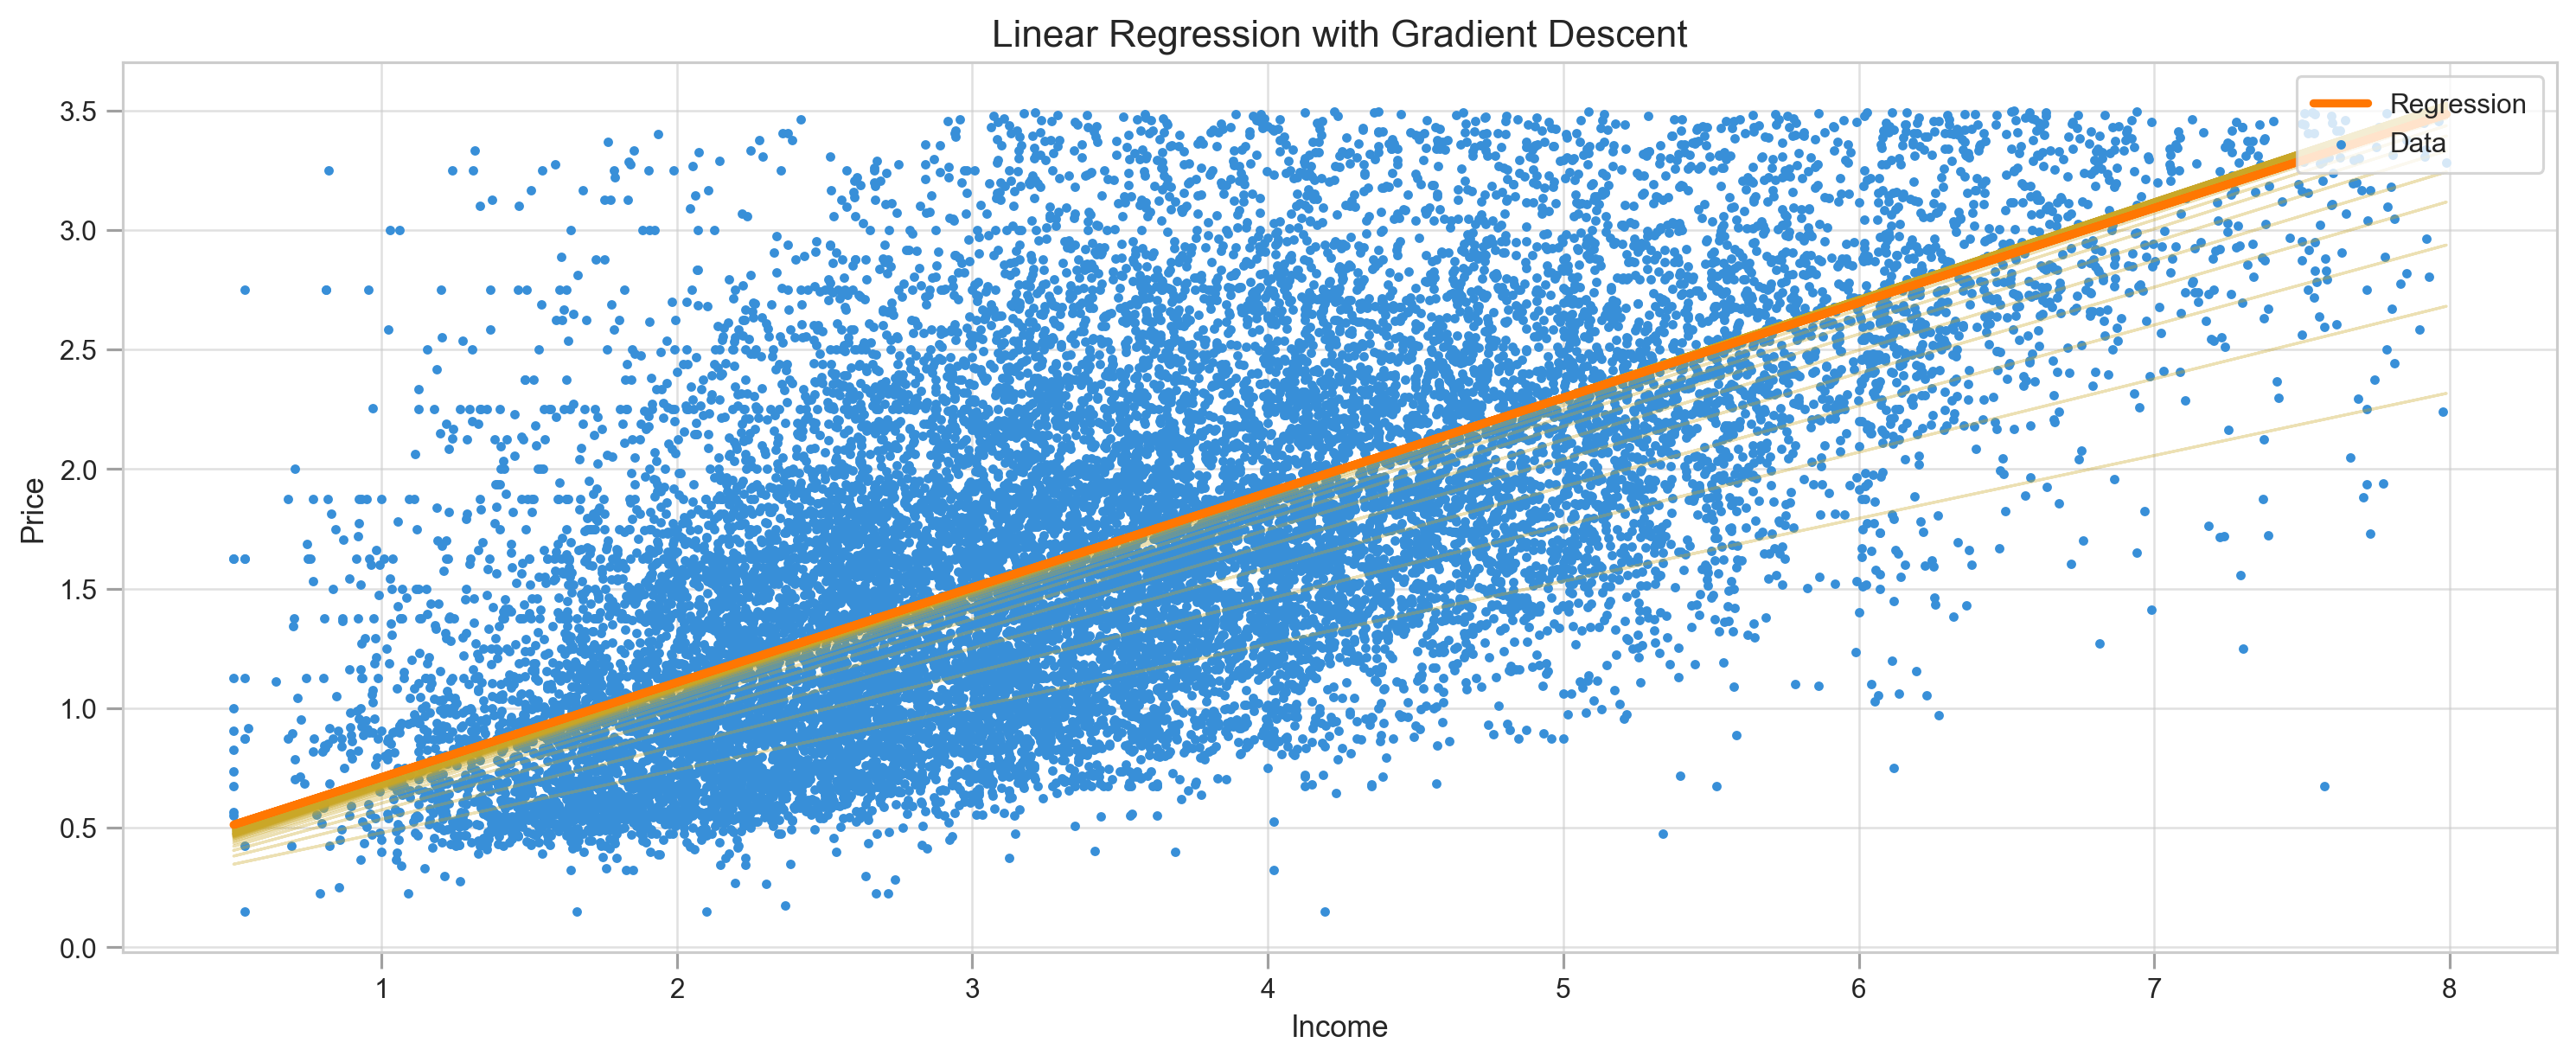

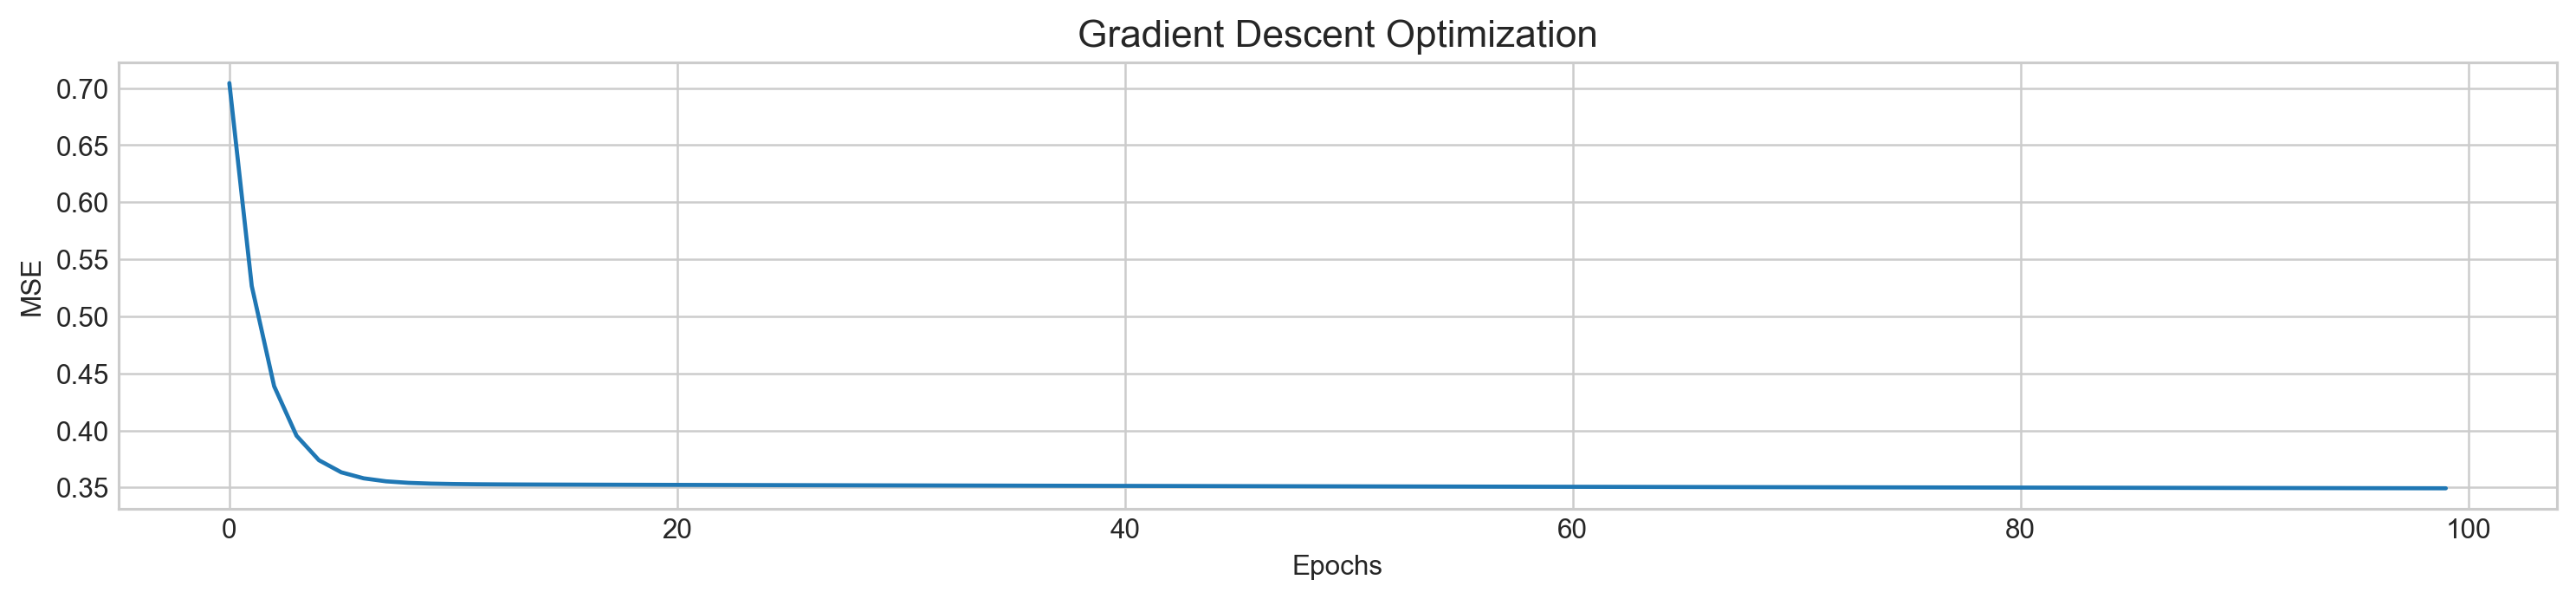

In [27]:
X = df.MedInc
y = df.Target

m, b, log, mse = gradient_descent(X, y, lr=0.01, epoch=100)

y_pred = m*X + b

print("MSE:",mean_squared_error(y, y_pred))
plot_regression(X, y, y_pred, log=log, title="Linear Regression with Gradient Descent")

plt.figure(figsize=(16,3))
plt.rcParams['figure.dpi'] = 227
plt.plot(range(len(mse)), mse)
plt.title('Gradient Descent Optimization', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

# Stochastic Gradient Descent

In [28]:
def SGD(X, y, lr=0.05, epoch=10, batch_size=1):
        
    '''
    Stochastic Gradient Descent for a single feature
    '''
    
    m, b = 0.5, 0.5 # initial parameters
    log, mse = [], [] # lists to store learning process
    
    for _ in range(epoch):
        
        indexes = np.random.randint(0, len(X), batch_size) # random sample
        
        Xs = np.take(X, indexes)
        ys = np.take(y, indexes)
        N = len(Xs)
        
        f = ys - (m*Xs + b)
        
        # Updating parameters m and b
        m -= lr * (-2 * Xs.dot(f).sum() / N)
        b -= lr * (-2 * f.sum() / N)
        
        log.append((m, b))
        mse.append(mean_squared_error(y, m*X+b))        
    
    return m, b, log, mse

In [29]:
m, b, log, mse = SGD(X, y, lr=0.01, epoch=100, batch_size=2)

MSE: 0.34378621525376835


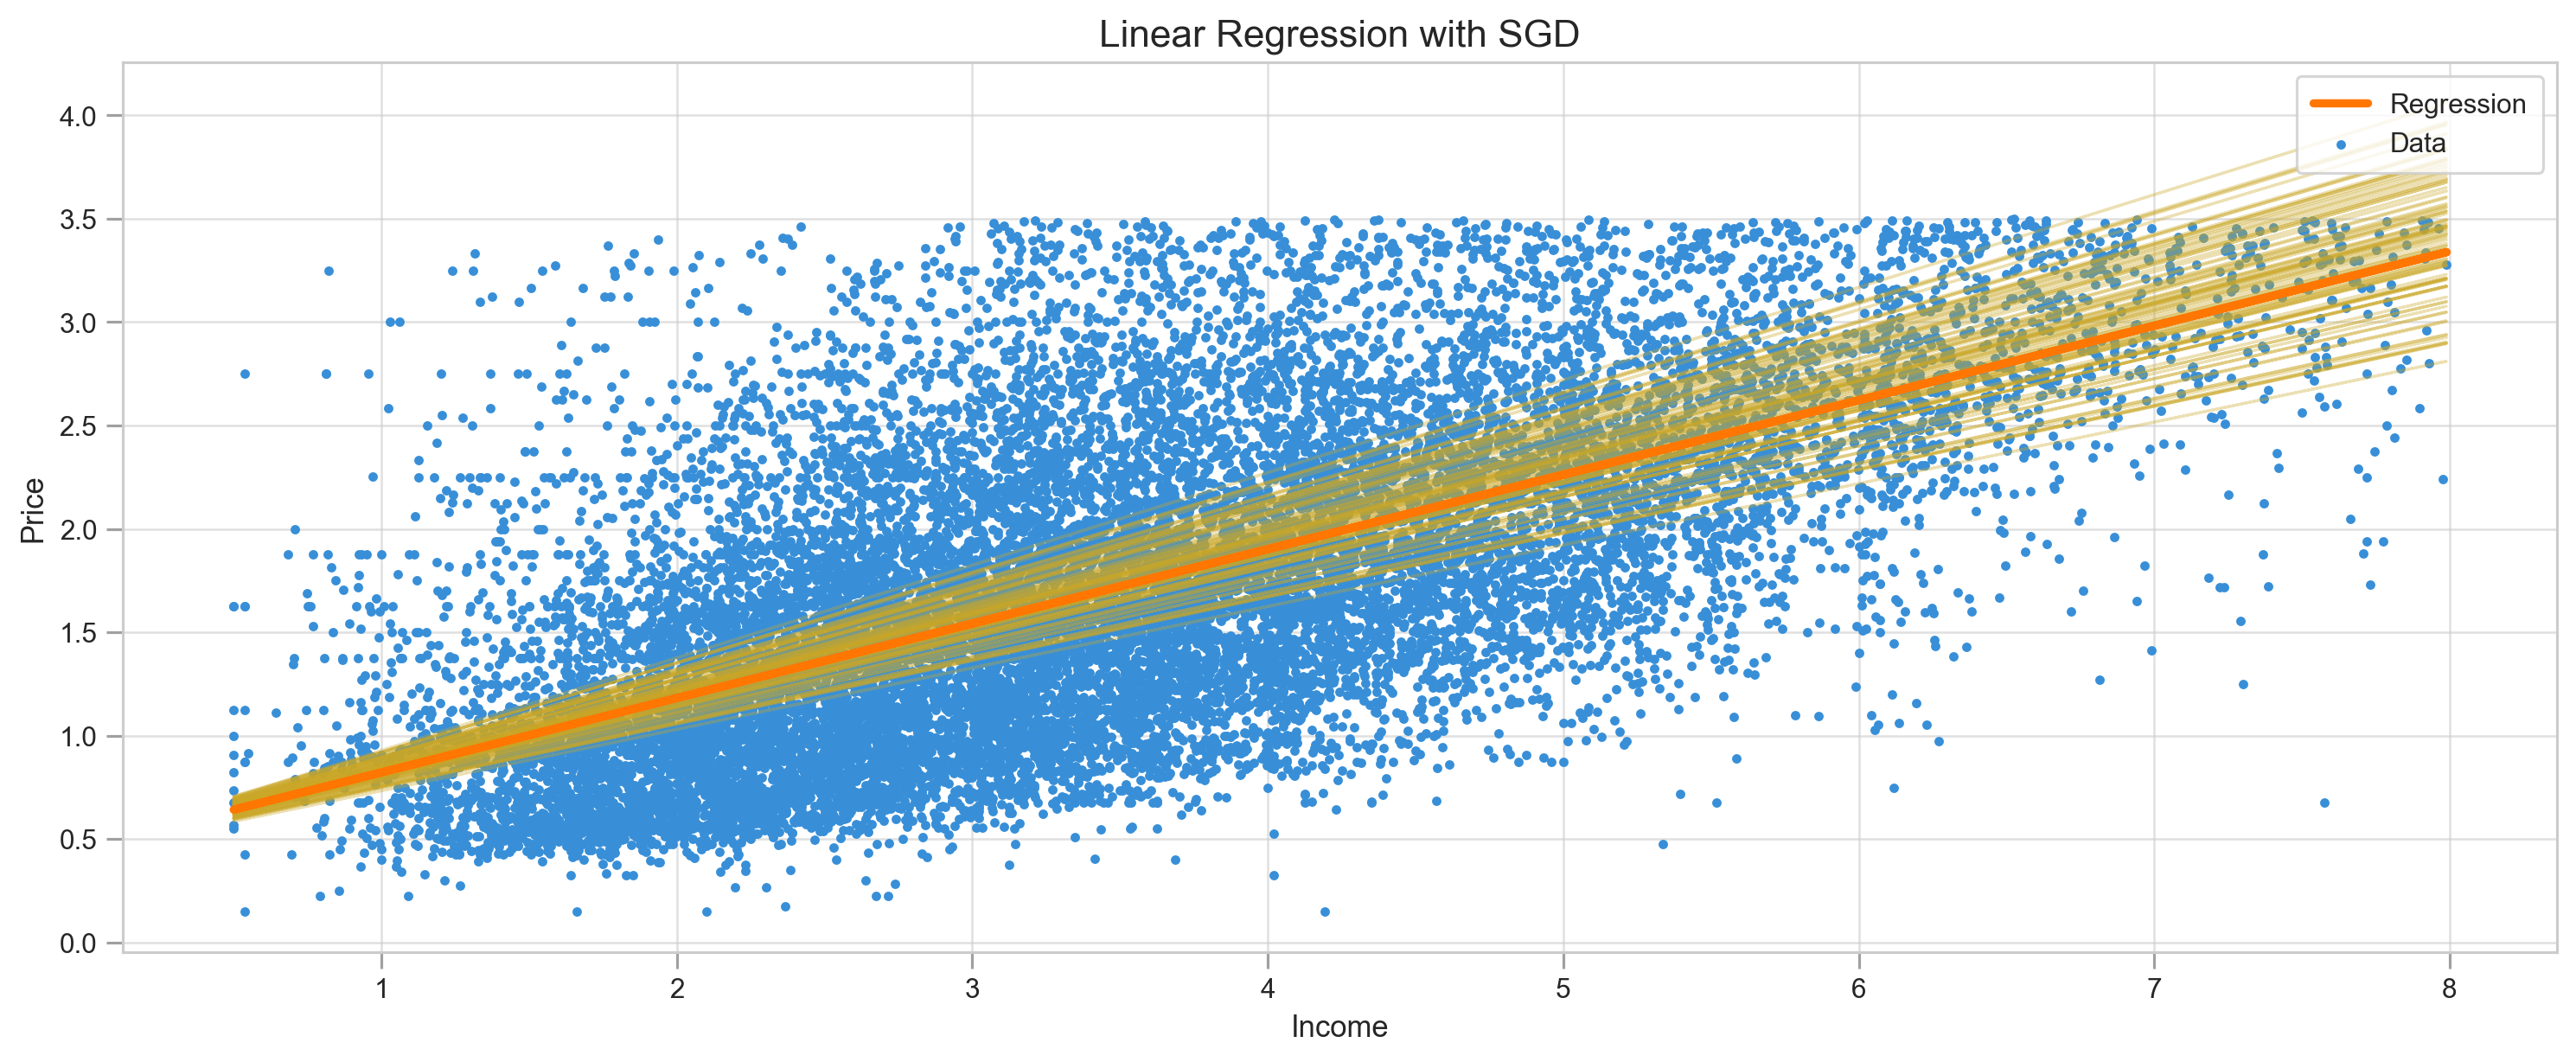

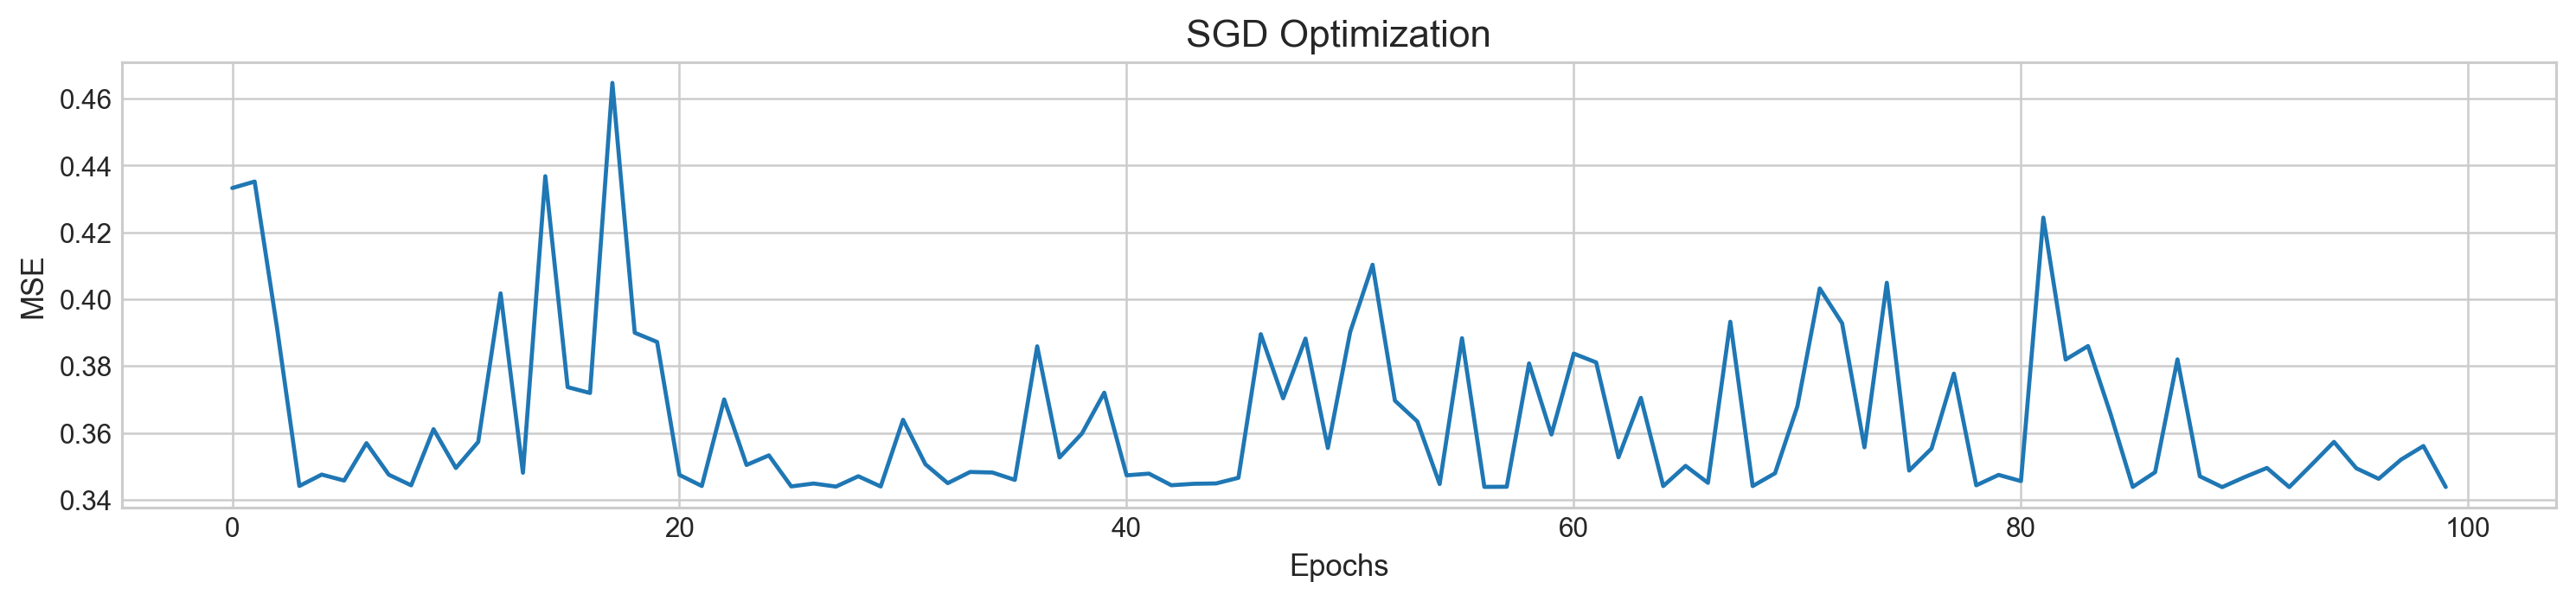

In [30]:
y_pred = m*X + b

print("MSE:",mean_squared_error(y, y_pred))
plot_regression(X, y, y_pred, log=log, title="Linear Regression with SGD")

plt.figure(figsize=(16,3))
plt.rcParams['figure.dpi'] = 227
plt.plot(range(len(mse)), mse)
plt.title('SGD Optimization', fontSize=14)
plt.xlabel('Epochs', fontSize=11)
plt.ylabel('MSE', fontSize=11)
plt.show()


# Speed Test for Gradient Descent vs SGD

In [31]:
X = df.MedInc
y = df.Target

In [32]:
X = np.concatenate((X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X))
y = np.concatenate((y,y,y,y,y,y,y,y,y,y,y,y,y,y,y,y,y))

In [33]:
X.shape, y.shape

((304946,), (304946,))

In [34]:
%timeit SGD(X, y, lr=0.01, epoch=1000, batch_size=1)

1.33 s ± 104 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [35]:
%timeit gradient_descent(X, y, lr=0.01, epoch=1000)


2.35 s ± 91.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
